In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing

In [3]:
data_dir = Path.cwd().parent / 'DATA'

In [4]:
# define target column
TARGET = "contest-tmp2m-14d__tmp2m"

In [5]:
pd.set_option('display.max_columns', 500)

# 0. Load Train/Test Data

In [6]:
%%time
train_df = pd.read_parquet(data_dir / "train_data.parquet")
print(f"training dataframe -> rows: {train_df.shape[0]}, cols: {train_df.shape[1]}")
train_mem_size = train_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(train_mem_size):,} MB")

training dataframe -> rows: 375734, cols: 246
-- memory usage: 761,726 MB
CPU times: total: 1.97 s
Wall time: 478 ms


In [7]:
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [8]:
%%time
test_df = pd.read_parquet(data_dir / "test_data.parquet")
# test_df = pd.read_csv(data_dir / "test_data.csv")
print(f"training dataframe -> rows: {test_df.shape[0]}, cols: {test_df.shape[1]}")
test_mem_size = test_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(test_mem_size):,} MB")

training dataframe -> rows: 31354, cols: 245
-- memory usage: 63,342 MB
CPU times: total: 31.2 ms
Wall time: 64.6 ms


In [9]:
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

In [10]:
target_min = train_df[TARGET].min()
target_delta = train_df[TARGET].max() - target_min
print(f"target variable range -> from: {target_min} to: {target_min + target_delta} deg C")

target variable range -> from: -20.35896342 to: 37.23878207


# 1. Address Data Quality Issues

## a. Location Mismatch between Train & Test

ref: <https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved>

In [11]:
SCALE = 14

In [12]:
def fix_locations(in_df: pd.DataFrame, lbl: str) -> pd.DataFrame:
    print(f"{lbl.upper()} dataset")
    for col in ["lat", "lon"]:
        in_df.loc[:, col] = round(in_df[col], SCALE)
        coord_map = {coord: str(n) for n, coord in enumerate(in_df[col].unique().tolist())}
        print(f"- assigning {col} codes from 0 to {len(coord_map) - 1}")
        in_df[f"{col}_cd"] = in_df[col].map(coord_map)
    in_df["location"] = in_df["lat_cd"] + "_" + in_df["lon_cd"]
    return in_df

In [13]:
train1_df = fix_locations(in_df=train_df, lbl="train")
test1_df = fix_locations(in_df=test_df, lbl="test")

TRAIN dataset
- assigning lat codes from 0 to 22
- assigning lon codes from 0 to 30
TEST dataset
- assigning lat codes from 0 to 22
- assigning lon codes from 0 to 30


In [14]:
# Concatenate train and test data
all_df = pd.concat([train1_df, test1_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

print(f'{all_df.loc_group.nunique()} unique locations')

514 unique locations


In [15]:
print(f"{len(all_df['location'].unique())} unique location codes")

514 unique location codes


In [16]:
train_df, test_df = "", ""

## b. Fill Missing Values w/ Mean

In [17]:
def fill_missing(in_df: pd.DataFrame) -> pd.DataFrame:
    out_df = in_df.copy()
    cols_w_na = in_df.columns[in_df.isna().any()].to_list()
    if len(cols_w_na):
        print("columns with missing values:\n")
        count_tot = out_df.shape[0]
        for col in cols_w_na:
            count_na = out_df[col].isna().sum()
            print(f"{col} -> count missing: {count_na}, percent: {round(count_na / count_tot * 100, 2)}%")
            col_mean = out_df[col].mean()
            print(f"-- mean: {round(col_mean, 4)}\n")
            out_df[col] = out_df[col].fillna(col_mean)
    else:
        print("no columns w/ missing values")
    return out_df

In [18]:
train2_df = fill_missing(in_df=train1_df)

columns with missing values:

nmme0-tmp2m-34w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 10.0993

nmme-tmp2m-56w__ccsm3 -> count missing: 10280, percent: 2.74%
-- mean: 9.6632

nmme-prate-34w__ccsm3 -> count missing: 8738, percent: 2.33%
-- mean: 31.2615

nmme0-prate-56w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 29.624

nmme0-prate-34w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 29.6526

nmme-prate-56w__ccsm3 -> count missing: 10280, percent: 2.74%
-- mean: 32.0076

nmme-tmp2m-34w__ccsm3 -> count missing: 8738, percent: 2.33%
-- mean: 9.821

ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 10.1015



In [19]:
test2_df = fill_missing(in_df=test1_df)

no columns w/ missing values


In [20]:
train1_df, test1_df = "", ""

# 2. Transform Data

## a. Determine Columns w/ High Correlation

In [21]:
THRSHLD = 0.9

In [22]:
skip_cols = [TARGET, "index"]

def column_corr(in_df: pd.DataFrame) -> list:
    trgt_corr = in_df.corr(numeric_only=True)[TARGET].sort_values(ascending=False)
    all_cols = trgt_corr.index.to_list()
    keep_cols = [c for c in all_cols if c not in skip_cols]
    trgt_corr = trgt_corr[trgt_corr.index.isin(keep_cols)]
    trgt_corr.name = "correlation"
    corr_df = pd.DataFrame(trgt_corr)
    corr_df["abs. corr."] = corr_df["correlation"].abs()
    top_corr_df = corr_df[corr_df["abs. corr."] >= THRSHLD]
    print(f"columns w/ abs. corr. above {THRSHLD}: {top_corr_df.shape[0]}")
    display(top_corr_df)
    return top_corr_df.index.to_list()

In [23]:
%%time
top_corr_cols = column_corr(in_df=train2_df)

columns w/ abs. corr. above 0.9: 19


,correlation,abs. corr.
nmme-tmp2m-56w__cfsv2,0.954668,0.954668
nmme-tmp2m-34w__cfsv2,0.954483,0.954483
nmme-tmp2m-56w__nmmemean,0.950865,0.950865
nmme-tmp2m-34w__nmmemean,0.950187,0.950187
nmme-tmp2m-56w__gfdlflora,0.949846,0.949846
nmme-tmp2m-34w__gfdlflorb,0.949346,0.949346
nmme-tmp2m-56w__gfdlflorb,0.949016,0.949016
nmme-tmp2m-34w__gfdlflora,0.947379,0.947379
nmme-tmp2m-56w__ccsm4,0.944435,0.944435
nmme-tmp2m-34w__ccsm4,0.943234,0.943234


CPU times: total: 33.2 s
Wall time: 46.2 s


In [24]:
baseline_cols = ["location", "index", "startdate", "lat", "lon", "elevation__elevation"]
keep_test = baseline_cols + top_corr_cols
keep_train = keep_test + [TARGET]

In [25]:
train3_df = train2_df[keep_train].copy()
test3_df = test2_df[keep_test].copy()

In [26]:
train2_df, test2_df = "", ""

In [27]:
print(f"train3 dataframe -> rows: {train3_df.shape[0]}, cols: {train3_df.shape[1]}")
print(f"test3 dataframe -> rows: {test3_df.shape[0]}, cols: {test3_df.shape[1]}")

train3 dataframe -> rows: 375734, cols: 26
test3 dataframe -> rows: 31354, cols: 25


## b. Create Date Features

In [28]:
date_cols = ["date", "year", "month", "week", "day_of_year"]

In [29]:
def prep_features(in_df: pd.DataFrame) -> pd.DataFrame:
    in_df["date"] = pd.to_datetime(in_df["startdate"])
    in_df["year"] = in_df["date"].dt.isocalendar().year
    in_df["week"] = in_df["date"].dt.isocalendar().week
    in_df["month"] = in_df["date"].dt.month
    first_day = pd.to_datetime({"year": in_df["year"], "month": "01", "day": "01"})
    in_df["day_of_year"] = (in_df["date"] - first_day).dt.days
    print(in_df[date_cols].head())
    return in_df.copy()

In [30]:
%%time
train4_df = prep_features(in_df=train3_df)

        date  year  month  week  day_of_year
0 2014-09-01  2014      9    36          243
1 2014-09-02  2014      9    36          244
2 2014-09-03  2014      9    36          245
3 2014-09-04  2014      9    36          246
4 2014-09-05  2014      9    36          247
CPU times: total: 15.8 s
Wall time: 20.6 s


In [31]:
%%time
test4_df = prep_features(in_df=test3_df)

        date  year  month  week  day_of_year
0 2022-11-01  2022     11    44          304
1 2022-11-02  2022     11    44          305
2 2022-11-03  2022     11    44          306
3 2022-11-04  2022     11    44          307
4 2022-11-05  2022     11    44          308
CPU times: total: 15.6 ms
Wall time: 70.3 ms


In [32]:
train3_df, test3_df = "", ""

## c. Apply Scaling

In [33]:
scaler = preprocessing.MinMaxScaler()

In [74]:
date_part_cols = date_cols.copy()
date_part_cols.remove("date")
date_part_cols.remove("year")

scaled_test_cols = date_part_cols + top_corr_cols + ["elevation__elevation"]
scaled_train_cols = scaled_test_cols + [TARGET]
passthrough_cols = ["index", "location", "date", "lat", "lon"]

In [75]:
def scale_features(in_df: pd.DataFrame, scaled_cols: list) -> pd.DataFrame:
    slct_df = in_df[scaled_cols]
    scaler.fit(slct_df)
    scaled_ndarray = scaler.transform(slct_df)
    out_df = pd.DataFrame(scaled_ndarray)
    out_df.columns = scaled_cols
    out_df[passthrough_cols] = in_df[passthrough_cols]
    out_df.index = in_df["date"]
    return out_df

In [76]:
%%time
train_scaled = scale_features(in_df=train4_df, scaled_cols=scaled_train_cols)
train_scaled.head()

CPU times: total: 328 ms
Wall time: 493 ms


,month,week,day_of_year,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-56w__nmmemean,nmme-tmp2m-34w__nmmemean,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-56w__nasa,nmme-tmp2m-34w__nasa,nmme-tmp2m-56w__gfdl,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__cancm3,nmme-tmp2m-56w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,elevation__elevation,contest-tmp2m-14d__tmp2m,index,location,date,lat,lon
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0.727273,0.673077,0.664865,0.836139,0.827369,0.860309,0.858386,0.803415,0.817825,0.832576,0.816319,0.844738,0.859161,0.844554,0.841984,0.842889,0.837906,0.834871,0.842156,0.824174,0.823033,0.882232,0.064516,0.852524,0,0_0,2014-09-01,0.0,0.833333
2014-09-02,0.727273,0.673077,0.667568,0.836139,0.827369,0.860309,0.858386,0.803415,0.817825,0.832576,0.816319,0.844738,0.859161,0.844554,0.841984,0.842889,0.837906,0.834871,0.842156,0.824174,0.823033,0.882232,0.064516,0.846032,1,0_0,2014-09-02,0.0,0.833333
2014-09-03,0.727273,0.673077,0.670270,0.836139,0.827369,0.860309,0.858386,0.803415,0.817825,0.832576,0.816319,0.844738,0.859161,0.844554,0.841984,0.842889,0.837906,0.834871,0.842156,0.824174,0.823033,0.882232,0.064516,0.841908,2,0_0,2014-09-03,0.0,0.833333
2014-09-04,0.727273,0.673077,0.672973,0.836139,0.827369,0.860309,0.858386,0.803415,0.817825,0.832576,0.816319,0.844738,0.859161,0.844554,0.841984,0.842889,0.837906,0.834871,0.842156,0.824174,0.823033,0.882232,0.064516,0.844057,3,0_0,2014-09-04,0.0,0.833333
2014-09-05,0.727273,0.673077,0.675676,0.836139,0.827369,0.860309,0.858386,0.803415,0.817825,0.832576,0.816319,0.844738,0.859161,0.844554,0.841984,0.842889,0.837906,0.834871,0.842156,0.824174,0.823033,0.882232,0.064516,0.846063,4,0_0,2014-09-05,0.0,0.833333


In [77]:
%%time
test_scaled = scale_features(in_df=test4_df, scaled_cols=scaled_test_cols)
test_scaled.head()

CPU times: total: 31.2 ms
Wall time: 44.2 ms


,month,week,day_of_year,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-56w__nmmemean,nmme-tmp2m-34w__nmmemean,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-56w__nasa,nmme-tmp2m-34w__nasa,nmme-tmp2m-56w__gfdl,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__cancm3,nmme-tmp2m-56w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,elevation__elevation,index,location,date,lat,lon
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0.0,0.0,0.000000,0.901187,0.891773,0.919471,0.927557,0.854995,0.877167,0.875985,0.894303,0.916548,0.922381,0.81842,0.839232,0.916913,0.919731,0.921267,0.903835,0.954091,0.950365,0.930018,0.064516,375734,0_0,2022-11-01,0.0,0.833333
2022-11-02,0.0,0.0,0.016667,0.901187,0.891773,0.919471,0.927557,0.854995,0.877167,0.875985,0.894303,0.916548,0.922381,0.81842,0.839232,0.916913,0.919731,0.921267,0.903835,0.954091,0.950365,0.930018,0.064516,375735,0_0,2022-11-02,0.0,0.833333
2022-11-03,0.0,0.0,0.033333,0.901187,0.891773,0.919471,0.927557,0.854995,0.877167,0.875985,0.894303,0.916548,0.922381,0.81842,0.839232,0.916913,0.919731,0.921267,0.903835,0.954091,0.950365,0.930018,0.064516,375736,0_0,2022-11-03,0.0,0.833333
2022-11-04,0.0,0.0,0.050000,0.901187,0.891773,0.919471,0.927557,0.854995,0.877167,0.875985,0.894303,0.916548,0.922381,0.81842,0.839232,0.916913,0.919731,0.921267,0.903835,0.954091,0.950365,0.930018,0.064516,375737,0_0,2022-11-04,0.0,0.833333
2022-11-05,0.0,0.0,0.066667,0.901187,0.891773,0.919471,0.927557,0.854995,0.877167,0.875985,0.894303,0.916548,0.922381,0.81842,0.839232,0.916913,0.919731,0.921267,0.903835,0.954091,0.950365,0.930018,0.064516,375738,0_0,2022-11-05,0.0,0.833333


## d. Create Lag Features by Location

In [78]:
all_locations = train_scaled["location"].unique().tolist()
print(f"all unique locations: {len(all_locations)}")

all unique locations: 514


In [79]:
def create_lag_cols(in_df: pd.DataFrame, lbl: str) -> pd.DataFrame:
    print(f"{lbl.upper()} dataset lagged columns:")
    loc_dfs = []
    for n, location_cd in enumerate(all_locations):
        loc_df = in_df[in_df["location"] == location_cd].copy()
        for lag in [1]:
            for m, col in enumerate(top_corr_cols, start=1):
                if not n and lag == 1:
                    print(m, col)
                loc_df[f"{col}__lag{lag}"] = loc_df[col].shift(lag)
        loc_df = loc_df.fillna(0)
        loc_dfs.append(loc_df)
        if not n % 50:
            print(f"...{n}", end="")
    comb_df = pd.concat(loc_dfs)
    print(f"\ncombined dataframe -> rows: {comb_df.shape[0]}, cols: {comb_df.shape[1]}")
    print(f"-- check unique locations: {len(comb_df['location'].unique())}")
    return comb_df

In [80]:
%%time
train_lagged = create_lag_cols(in_df=train_scaled, lbl="train")

TRAIN dataset lagged columns:
1 nmme-tmp2m-56w__cfsv2
2 nmme-tmp2m-34w__cfsv2
3 nmme-tmp2m-56w__nmmemean
4 nmme-tmp2m-34w__nmmemean
5 nmme-tmp2m-56w__gfdlflora
6 nmme-tmp2m-34w__gfdlflorb
7 nmme-tmp2m-56w__gfdlflorb
8 nmme-tmp2m-34w__gfdlflora
9 nmme-tmp2m-56w__ccsm4
10 nmme-tmp2m-34w__ccsm4
11 nmme-tmp2m-56w__nasa
12 nmme-tmp2m-34w__nasa
13 nmme-tmp2m-56w__gfdl
14 nmme-tmp2m-34w__gfdl
15 nmme-tmp2m-34w__cancm3
16 nmme-tmp2m-56w__cancm3
17 nmme-tmp2m-34w__cancm4
18 nmme-tmp2m-56w__cancm4
19 nmme-tmp2m-56w__ccsm3
...0...50...100...150...200...250...300...350...400...450...500
combined dataframe -> rows: 375734, cols: 48
-- check unique locations: 514
CPU times: total: 9.45 s
Wall time: 14.3 s


In [81]:
%%time
test_lagged = create_lag_cols(in_df=test_scaled, lbl="test")

TEST dataset lagged columns:
1 nmme-tmp2m-56w__cfsv2
2 nmme-tmp2m-34w__cfsv2
3 nmme-tmp2m-56w__nmmemean
4 nmme-tmp2m-34w__nmmemean
5 nmme-tmp2m-56w__gfdlflora
6 nmme-tmp2m-34w__gfdlflorb
7 nmme-tmp2m-56w__gfdlflorb
8 nmme-tmp2m-34w__gfdlflora
9 nmme-tmp2m-56w__ccsm4
10 nmme-tmp2m-34w__ccsm4
11 nmme-tmp2m-56w__nasa
12 nmme-tmp2m-34w__nasa
13 nmme-tmp2m-56w__gfdl
14 nmme-tmp2m-34w__gfdl
15 nmme-tmp2m-34w__cancm3
16 nmme-tmp2m-56w__cancm3
17 nmme-tmp2m-34w__cancm4
18 nmme-tmp2m-56w__cancm4
19 nmme-tmp2m-56w__ccsm3
...0...50...100...150...200...250...300...350...400...450...500
combined dataframe -> rows: 31354, cols: 47
-- check unique locations: 514
CPU times: total: 3.53 s
Wall time: 5.32 s


# 3. Train/Val Splitting

## a. Simple Split (naive, two-fold)

In [82]:
TRAIN_PCNT = 0.8

In [83]:
FIG_SIZE = (15,9)

In [84]:
train_lagged["date"].describe(datetime_is_numeric=True)

count                           375734
mean     2015-08-31 23:59:59.999999744
min                2014-09-01 00:00:00
25%                2015-03-02 00:00:00
50%                2015-09-01 00:00:00
75%                2016-03-02 00:00:00
max                2016-08-31 00:00:00
Name: date, dtype: object

In [85]:
cutoff_date = train_lagged["date"].quantile(q=TRAIN_PCNT)

In [86]:
train_split = train_lagged.copy()
train_split["split"] = train_split["date"].apply(lambda x: "train" if x <= cutoff_date else "val")
train_split["split"].value_counts()

train    300690
val       75044
Name: split, dtype: int64

In [87]:
sample_loc = "14_15"
sample_df = train_split.loc[train_split["location"] == sample_loc, ["date", TARGET, "split"]]
print(f"sample location -> rows: {sample_df.shape[0]}, cols: {sample_df.shape[1]}")
sample_df["split"].value_counts()

sample location -> rows: 731, cols: 3


train    585
val      146
Name: split, dtype: int64

In [88]:
color_map = {"train": "b", "val": "r"}

In [89]:
colors = sample_df.split.map(color_map)

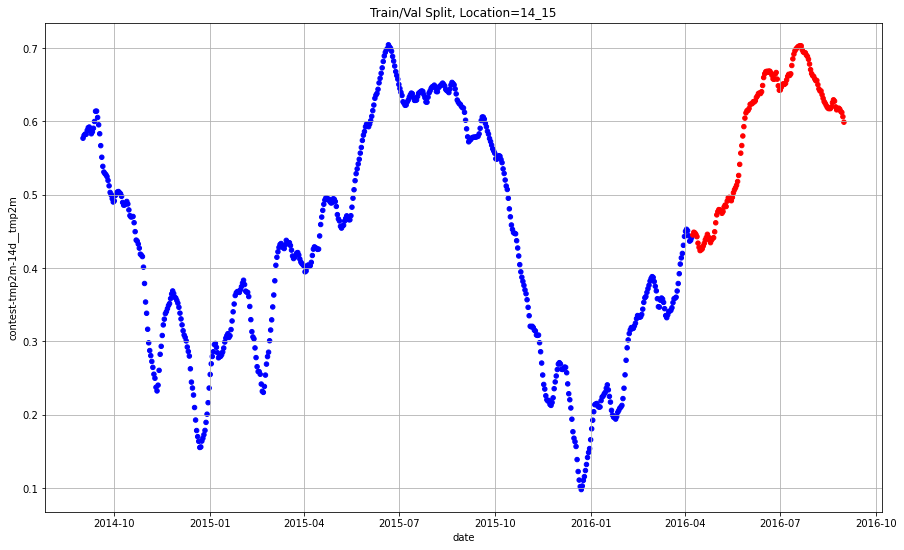

In [90]:
sample_df.plot.scatter(
    x="date", y=TARGET, 
    figsize=FIG_SIZE, marker="o", 
    color=colors, 
    title=f"Train/Val Split, Location={sample_loc}"
)
plt.grid()
plt.show()

# 4. Modeling

In [91]:
info_cols = ["index", "date", "location", "split"]

In [92]:
feature_cols = [c for c in train_split.columns if (c not in info_cols) and (c != TARGET)]
print(f"selected {len(feature_cols)} features")
keep_cols = feature_cols.copy()
keep_cols.append("split")

selected 44 features


In [93]:
def check_missing(in_df: pd.DataFrame) -> None:
    cols_w_na = in_df.columns[in_df.isna().any()].to_list()
    if len(cols_w_na):
        print("columns with missing values:\n")
        count_tot = in_df.shape[0]
        for col in cols_w_na:
            count_na = in_df[col].isna().sum()
            print(f"{col} -> count missing: {count_na}, percent: {round(count_na / count_tot * 100, 2)}%")
            col_mean = in_df[col].mean()
            print(f"-- mean: {round(col_mean, 4)}\n")
    else:
        print("no columns w/ missing values")

In [94]:
check_missing(in_df=train_split)

no columns w/ missing values


### > create sample dataset for testing

In [95]:
import random

In [160]:
SMPL_SZ = 260

In [161]:
n_locations = len(all_locations)
smpl_indices = random.sample(range(0, n_locations), SMPL_SZ)
smpl_locs = [all_locations[i] for i in smpl_indices]
smpl_dfs = []
print(f"included locations: {SMPL_SZ}")
for loc in smpl_locs:
    if SMPL_SZ < 25:
        print(f"{loc}, ", end="")
    loc_df = train_split[train_split["location"] == loc]
    smpl_dfs.append(loc_df)
train_samples = pd.concat(smpl_dfs)
print(f"\ndownsample dataframe -> rows: {train_samples.shape[0]}, cols: {train_samples.shape[1]}")

included locations: 260


downsample dataframe -> rows: 190060, cols: 49


## a. AdaBoostRegressor

In [162]:
from sklearn.ensemble import AdaBoostRegressor

In [200]:
# seperate features and target
X, Y = train_split[keep_cols], train_split[[TARGET, "split", "location"]]
# X, Y = train_samples[keep_cols], train_samples[[TARGET, "split", "location"]]

In [201]:
# Split in train-test
X_train = X.loc[X["split"] == "train", feature_cols]
X_val = X.loc[X["split"] == "val", feature_cols]
Y_train = Y.loc[Y["split"] == "train", TARGET]
Y_val = Y.loc[Y["split"] == "val", ["location", TARGET]]

In [202]:
# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(
    n_estimators=780,
    learning_rate=0.1,
)

In [203]:
%%time
%%capture cap
# Fit the data
mdl_adaboost.fit(X_train, Y_train)

CPU times: total: 21min 25s
Wall time: 28min 37s


In [ ]:
duration = cap.stdout

In [204]:
# Make predictions
pred = mdl_adaboost.predict(X_val)

# 5. Evaluate Predictions

## a. Metrics

In [205]:
from sklearn.metrics import mean_squared_error, r2_score

In [206]:
compare = pd.DataFrame()
compare["location"] = Y_val["location"]
compare['real_scaled'] = Y_val[TARGET]
compare["real"] = target_min + compare['real_scaled'] * target_delta
compare['pred_scaled'] = pred
compare["predicted"] = target_min + compare['pred_scaled'] * target_delta
compare = compare.reset_index()

In [207]:
compare.head()

,date,location,real_scaled,real,pred_scaled,predicted
0,2016-04-08,0_0,0.792907,25.310697,0.721773,21.213529
1,2016-04-09,0_0,0.795678,25.470303,0.721773,21.213529
2,2016-04-10,0_0,0.797984,25.603136,0.721773,21.213529
3,2016-04-11,0_0,0.797058,25.549756,0.721773,21.213529
4,2016-04-12,0_0,0.800261,25.734263,0.721773,21.213529


In [208]:
metrics = {
    "MSE": round(mean_squared_error(compare["real"], compare["predicted"]), 4),
    "RMSE": round(mean_squared_error(compare["real"], compare["predicted"], squared=False), 4),
    "R2": round(r2_score(compare["real"], compare["predicted"]), 4),
}

In [209]:
for mtrc, val in metrics.items():
    print(f"{mtrc}: {val}")

MSE: 5.7324
RMSE: 2.3942
R2: 0.8579


## b. Graphs

In [210]:
from datetime import datetime
import json

In [211]:
todays_dt = datetime.today().strftime("%Y-%m-%d")

In [212]:
GRAPH_LOC_N = 5

In [220]:
graph_locs = smpl_locs[0:GRAPH_LOC_N].copy()
graph_df = compare[compare["location"].isin(graph_locs)].reset_index(drop=True).copy()

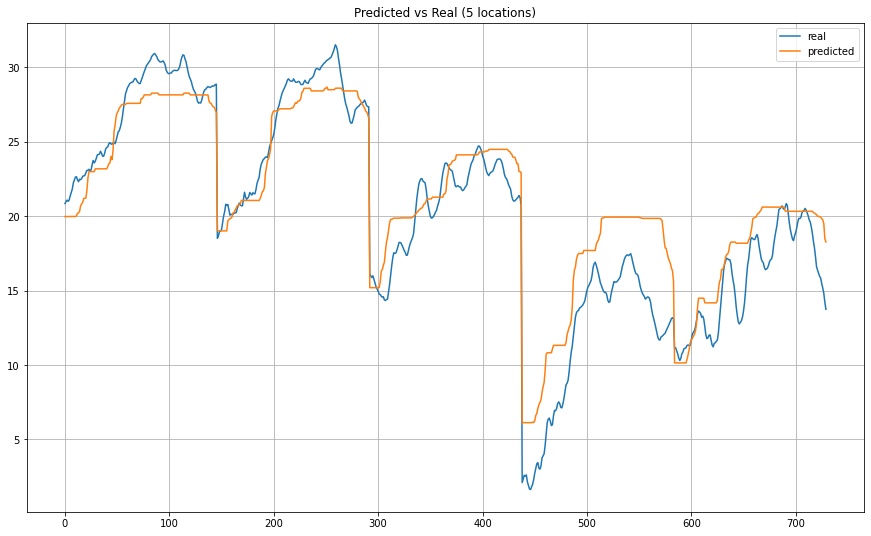

In [221]:
graph_df.plot.line(y=["real", "predicted"], figsize=FIG_SIZE)
plt.title(f"Predicted vs Real ({GRAPH_LOC_N} locations)")
plt.grid()
plt.savefig(f"artifacts/first_draft2_{todays_dt}.png")
plt.show()

## c. Export Model Artifacts

In [222]:
params_file = Path.cwd() / "artifacts" / f"first_draft2_{todays_dt}.json"

In [231]:
params = {
    "algorithm": "AdaBoostRegressor",
    "scaler": "MinMaxScaler",
    "missing value strategy": "replace w/ mean",
    "correlation threshold": THRSHLD,
    "lags": [1],
    "n_features": len(feature_cols),
    "sample locations": "514 (all)",
    "data rows": train_split.shape[0],
    "model params": mdl_adaboost.get_params(deep=True),
    "duration": duration,
    "metrics": metrics,
}

In [232]:
with open(params_file, "w") as js_out:
    json.dump(params, js_out, indent=4)

In [225]:
from joblib import dump, load
dump(mdl_adaboost, f"artifacts/first_draft2_{todays_dt}.joblib")

['artifacts/first_draft2_2023-01-25.joblib']